# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [2]:
# Checking the unique number of mice id.
number_unique_mice = merged_df["Mouse ID"].nunique()
print("Number of unique mice in the datasets:", number_unique_mice)

Number of unique mice in the datasets: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
print(duplicate_mouse_id)

#display the duplicated data 
duplicate_mouse_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_id)]
print("Data associated with the duplicate mouse ID:", duplicate_mouse_id)
print(duplicate_mouse_data)

['g989']
Data associated with the duplicate mouse ID: ['g989']
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
9

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_id)]
print("Cleaned DataFrame without the duplicate data:")
print(cleaned_df)

Cleaned DataFrame without the duplicate data:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1          

In [6]:
# Checking the number of mice in the clean DataFrame.
number_unique_mice_cleaned = cleaned_df["Mouse ID"].nunique()
print("Number of unique mice in the cleaned datasets:", number_unique_mice_cleaned)

Number of unique mice in the cleaned datasets: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [8]:
Tumor_volume_data = merged_df.groupby('Drug Regimen')
Tumor_volume_data = Tumor_volume_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for better clarity
Tumor_volume_data.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Variance Tumor Volume', 'Standard Deviation Tumor Volume', 'Std.Err Tumor Volume']

# Display the summary statistics DataFrame
print(Tumor_volume_data)


              Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation Tumor Volume  Std.

## Bar and Pie Charts

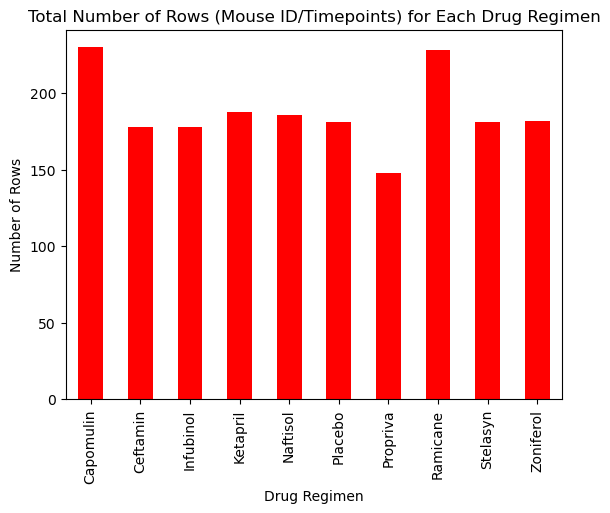

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#define 
regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot
regimen_counts.plot(kind='bar', color='red')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()

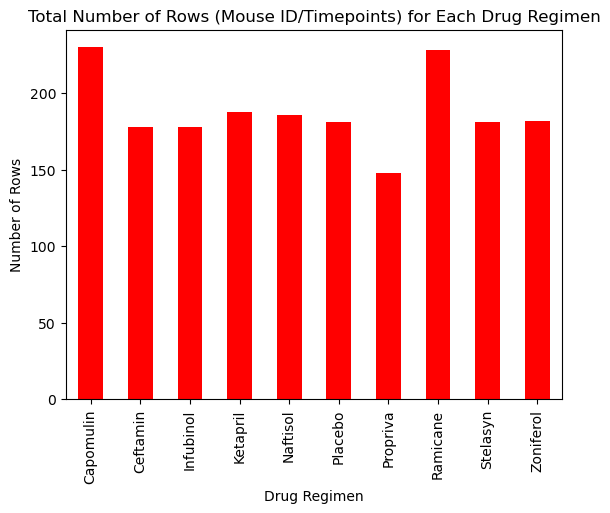

In [10]:
regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot
regimen_counts.plot(kind='bar', color='red')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()

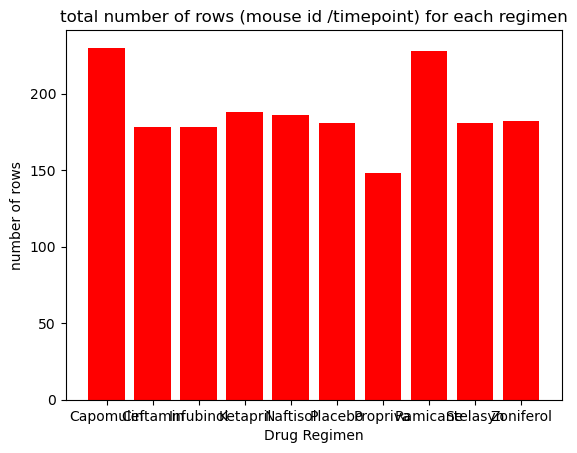

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_data = cleaned_df.groupby('Drug Regimen').size()

#ploting
plt.bar(grouped_data.index,grouped_data, color='red')
plt.xlabel('Drug Regimen')
plt.ylabel('number of rows')
plt.title('total number of rows (mouse id /timepoint) for each regimen') 
plt.show()

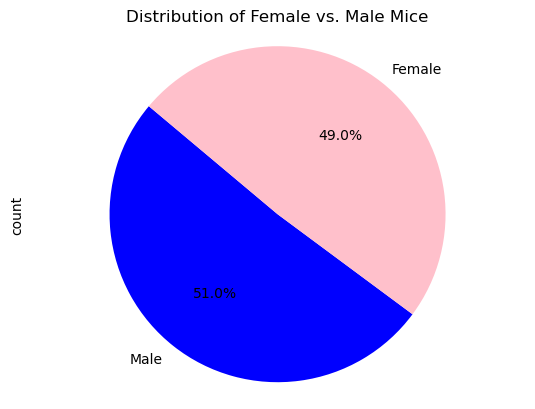

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#group[ data by gender ]
grouped_data = cleaned_df['Sex'].value_counts()

#plot 
grouped_data.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'pink'], startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.axis('equal')
plt.show()


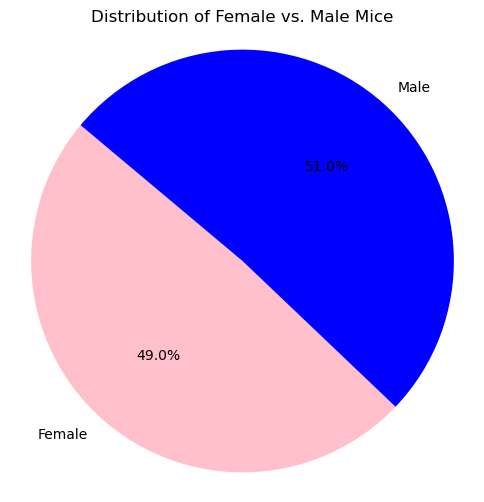

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#define 
labels = ['Female', 'Male']
sizes = ['49', '51']

#plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'blue'])
plt.axis('equal')  

plt.title('Distribution of Female vs. Male Mice')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Group by 'Mouse ID' and find the maximum 'Timepoint'
max_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data_list = []

# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:

   # Locate the rows that correspond to the current treatment
    tumor_volume = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    # Append the tumor volume data to the list
    tumor_volume_data_list.append(tumor_volume)
   
# Calculate quartiles, IQR, and determine potential outliers
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
   
    # Determine potential outliers
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
   
    # Print the results
    print(f"Potential outliers for {treatment}: {outliers}")


Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_data = {
    'Capomulin': merged_df[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
    'Ramicane': merged_df[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
    'Infubinol': merged_df[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
    'Ceftamin': merged_df[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
}


## Line and Scatter Plots

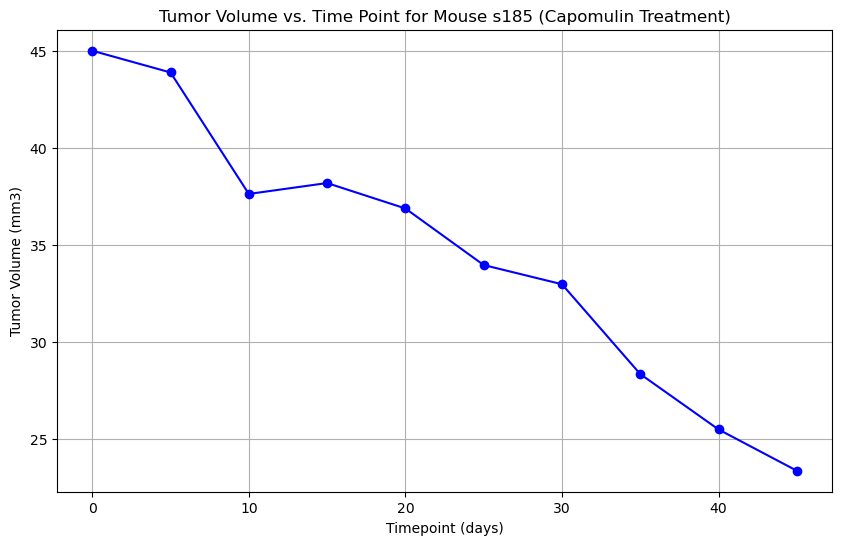

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
random_mouse_id = capomulin_data['Mouse ID'].iloc[0] #finding first occurence of Capomulin drug regimen mose
random_mouse_id
capomulin_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == random_mouse_id)]
#finding first occurence of Capomulin drug regimen mose
random_mouse_id
capomulin_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == random_mouse_id)]
# Create a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title(f'Tumor Volume vs. Time Point for Mouse {random_mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

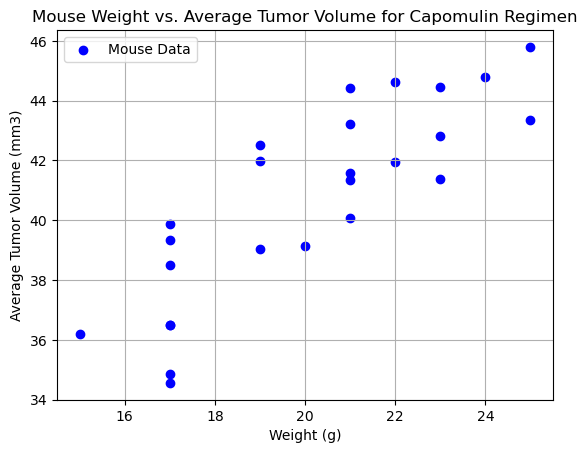

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only mice on the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group the filtered data by the mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Mouse Data')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()


## Correlation and Regression

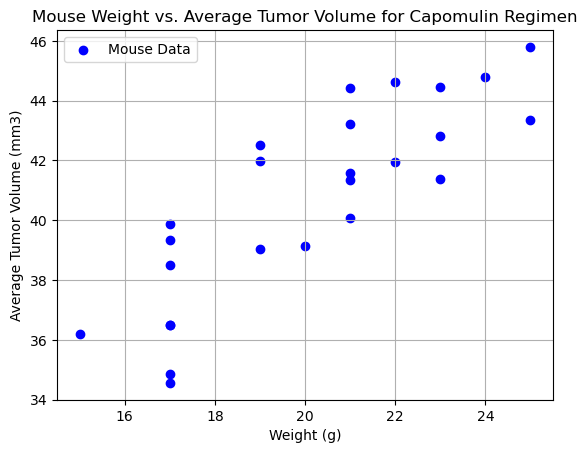

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data to include only mice on the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group the filtered data by the mouse ID and calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b', label='Mouse Data')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()


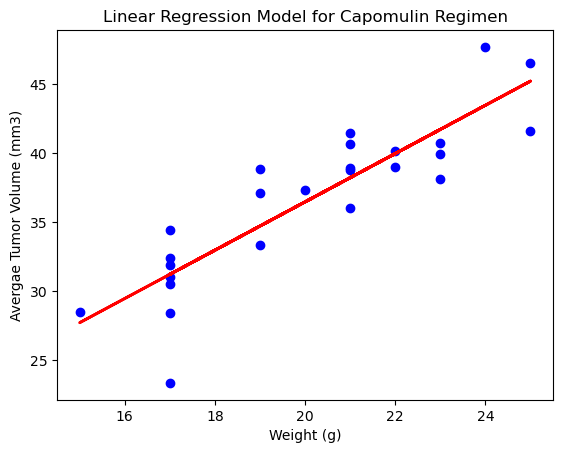

The correlation between mouse weight and the average tumor volume is: 0.876706040365812


In [20]:
# for Linear regression and correlation
from sklearn.linear_model import LinearRegression
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data_merged = merged_df[merged_df['Drug Regimen'] == 'Capomulin']
correlation = capomulin_data_merged['Weight (g)'].corr(capomulin_data_merged['Tumor Volume (mm3)'])

# Fit a linear regression model
X = capomulin_data_merged[['Weight (g)']]
y = capomulin_data_merged['Tumor Volume (mm3)']

model = LinearRegression()
model.fit(X, y)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Avergae Tumor Volume (mm3)')
plt.title('Linear Regression Model for Capomulin Regimen')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
